In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
dfhead = pd.read_csv('NBAFutures1.csv')
dftail = pd.read_csv('NBAFuturesTest1.csv')
df = dfhead.append(dftail, ignore_index = True)
df.head()

,Unnamed: 0,Player,Year,Pos,Age,Tm,G,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,PTS2,TRB2,AST2,STL2,BLK2
0,0,Kareem Abdul-Jabbar,1980,C,32,LAL,82,38.3,10.2,16.9,...,1.0,3.4,3.6,2.6,24.8,26.2,10.3,3.4,0.7,2.9
1,1,Kareem Abdul-Jabbar,1981,C,33,LAL,80,37.2,10.5,18.2,...,0.7,2.9,3.1,3.1,26.2,23.9,8.7,3.0,0.8,2.7
2,2,Kareem Abdul-Jabbar,1982,C,34,LAL,76,35.2,9.9,17.1,...,0.8,2.7,3.0,2.9,23.9,21.8,7.5,2.5,0.8,2.2
3,3,Kareem Abdul-Jabbar,1983,C,35,LAL,79,32.3,9.1,15.5,...,0.8,2.2,2.5,2.8,21.8,21.5,7.3,2.6,0.7,1.8
4,4,Kareem Abdul-Jabbar,1984,C,36,LAL,80,32.8,9.0,15.5,...,0.7,1.8,2.8,2.6,21.5,22.0,7.9,3.2,0.8,2.1


In [2]:
df = df.drop(['Unnamed: 0'], axis=1)

In [3]:
df = df[['Player','Year','Pos','Age','PTS','TRB','AST','STL','BLK','PTS2','TRB2','AST2','STL2','BLK2']]

In [4]:
dum1 = pd.get_dummies(df['Pos'])
df1 = pd.concat([df, dum1], axis=1)
df1 = df1.drop(['Pos'], axis=1)
df1 = df1.set_index('Player')
df1.head()

,Year,Age,PTS,TRB,AST,STL,BLK,PTS2,TRB2,AST2,STL2,BLK2,C,PF,PG,SF,SG
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,1980,32,24.8,10.8,4.5,1.0,3.4,26.2,10.3,3.4,0.7,2.9,1,0,0,0,0
Kareem Abdul-Jabbar,1981,33,26.2,10.3,3.4,0.7,2.9,23.9,8.7,3.0,0.8,2.7,1,0,0,0,0
Kareem Abdul-Jabbar,1982,34,23.9,8.7,3.0,0.8,2.7,21.8,7.5,2.5,0.8,2.2,1,0,0,0,0
Kareem Abdul-Jabbar,1983,35,21.8,7.5,2.5,0.8,2.2,21.5,7.3,2.6,0.7,1.8,1,0,0,0,0
Kareem Abdul-Jabbar,1984,36,21.5,7.3,2.6,0.7,1.8,22.0,7.9,3.2,0.8,2.1,1,0,0,0,0


In [5]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
dum = ['PTS2','TRB2','AST2','STL2','BLK2']
for du in dum:
    cols.remove(du)

In [6]:
cols_at_end = ['PTS2','BLK2','STL2','AST2','TRB2']
df1 = df1[[c for c in df1 if c not in cols_at_end] + [c for c in cols_at_end if c in df1]]
check = df1.copy(deep=True)
df1.head()

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,1980,32,24.8,10.8,4.5,1.0,3.4,1,0,0,0,0,26.2,2.9,0.7,3.4,10.3
Kareem Abdul-Jabbar,1981,33,26.2,10.3,3.4,0.7,2.9,1,0,0,0,0,23.9,2.7,0.8,3.0,8.7
Kareem Abdul-Jabbar,1982,34,23.9,8.7,3.0,0.8,2.7,1,0,0,0,0,21.8,2.2,0.8,2.5,7.5
Kareem Abdul-Jabbar,1983,35,21.8,7.5,2.5,0.8,2.2,1,0,0,0,0,21.5,1.8,0.7,2.6,7.3
Kareem Abdul-Jabbar,1984,36,21.5,7.3,2.6,0.7,1.8,1,0,0,0,0,22.0,2.1,0.8,3.2,7.9


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#cols = df1.columns
sc1 = StandardScaler()
for col in cols:
    df1[[col]] = sc1.fit_transform(df1[[col]])
sc2 = StandardScaler()
df1[['PTS2']] = sc2.fit_transform(df1[['PTS2']])    
sc3 = StandardScaler()
df1[['BLK2']] = sc3.fit_transform(df1[['BLK2']])
sc4 = StandardScaler()
df1[['STL2']] = sc4.fit_transform(df1[['STL2']])
sc5 = StandardScaler()
df1[['AST2']] = sc5.fit_transform(df1[['AST2']])
sc6 = StandardScaler()
df1[['TRB2']] = sc6.fit_transform(df1[['TRB2']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,-1.898146,1.407294,2.542378,2.635391,1.235413,0.536671,5.430987,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.764691,4.662253,0.008694,0.721331,2.471482
Kareem Abdul-Jabbar,-1.809213,1.662855,2.772446,2.443237,0.669076,-0.083946,4.504145,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.400079,4.283902,0.210459,0.516001,1.871146
Kareem Abdul-Jabbar,-1.720280,1.918416,2.394478,1.828344,0.463136,0.122926,4.133409,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.067173,3.338025,0.210459,0.259338,1.420895
Kareem Abdul-Jabbar,-1.631346,2.173977,2.049376,1.367174,0.205710,0.122926,3.206567,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.019615,2.581323,0.008694,0.310671,1.345853
Kareem Abdul-Jabbar,-1.542413,2.429538,2.000076,1.290312,0.257195,-0.083946,2.465093,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.098878,3.148849,0.210459,0.618666,1.570979


In [8]:
df3 = df1[0:len(dfhead)]
df4 = df1[len(dfhead):]

In [9]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

# Predictions

In [10]:
import os
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

Using TensorFlow backend.


## 2018-2019 NBA Season

In [12]:
dftail = pd.read_csv('NBAFuturesTest1.csv')
dftail = dftail[['Player','PTS','TRB','AST','STL','BLK']]
dftail['Value'] = 1*dftail['PTS'] + 1.2*dftail['TRB'] + 1.5*dftail['AST'] + 3*dftail['STL'] + 3*dftail['BLK']
dftail = dftail.set_index('Player')
dftail.sort_values('Value', ascending=False).head(10)

,PTS,TRB,AST,STL,BLK,Value
Player,,,,,,
James Harden,36.1,6.6,7.5,2.0,0.7,63.37
Giannis Antetokounmpo,27.7,12.5,5.9,1.3,1.5,59.95
Russell Westbrook,22.9,11.1,10.7,1.9,0.5,59.47
Anthony Davis,25.9,12.0,3.9,1.6,2.4,58.15
Joel Embiid,27.5,13.6,3.7,0.7,1.9,57.17
LeBron James,27.4,8.5,8.3,1.3,0.6,55.75
Karl-Anthony Towns,24.4,12.4,3.4,0.9,1.6,51.88
Paul George,28.0,8.2,4.1,2.2,0.4,51.79
Nikola Jokic,20.1,10.8,7.3,1.4,0.7,50.31


## 2019 - 2020 NBA Season

In [13]:
train=df3
test=df4
trains = np.split(train, [12], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [12], axis=1)
test_x=tests[0]
test_y=tests[1]

In [14]:
test_y.head()

,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,
Alex Abrines,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Quincy Acy,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Jaylen Adams,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Steven Adams,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Bam Adebayo,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176


In [15]:
cols_at_end = ['TRB2','AST2','STL2','BLK2','PTS2']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
models = [0, 0, 0, 0, 0]
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    train_x3 = train_x
    test_x3 = test_x
    X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
    X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])
    K.clear_session()
    models[x] = ExtraTreesRegressor(n_estimators=1000, bootstrap=True).fit(train_x.values, train_y[col].values)
    test_y2[col] = scalar.inverse_transform(models[x].predict(test_x3.values))

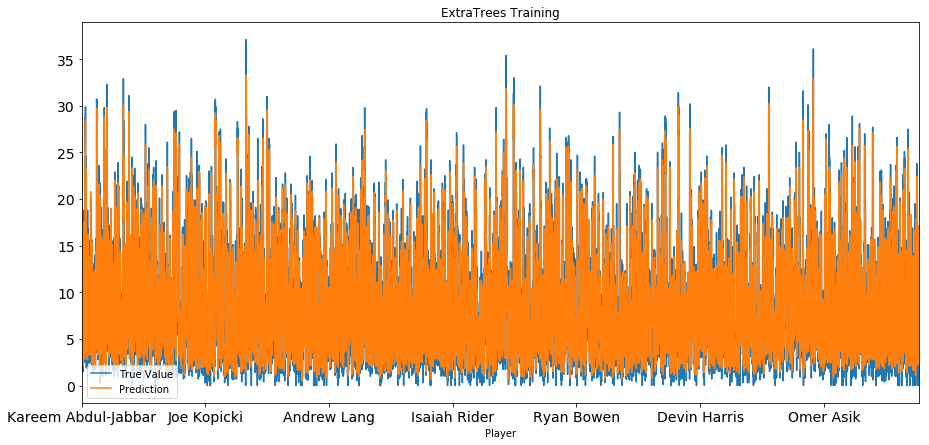

adj train r^2 = 0.9643956060408565
train mse = 1.3598538543549599


In [16]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(models[4].predict(train_x3.values))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'ExtraTrees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'ExtraTrees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))

In [17]:
print('The best players of the 2019-2020 Season are:')
test_y2['Value'] = 1*test_y2['PTS2'] + 1.2*test_y2['TRB2'] + 1.5*test_y2['AST2'] + 3*test_y2['STL2'] + 3*test_y2['BLK2']
test_y2.sort_values('Value', ascending=False).head(10)

The best players of the 2019-2020 Season are:


,PTS2,BLK2,STL2,AST2,TRB2,Value
Player,,,,,,
Giannis Antetokounmpo,27.1030,1.2725,1.4345,5.7982,11.3348,57.52306
Russell Westbrook,22.6067,0.5097,1.7790,10.0346,10.5269,57.15698
Joel Embiid,26.2665,1.7069,0.7546,3.4703,12.8943,54.32961
James Harden,28.2626,0.6032,1.7176,7.3631,6.3596,53.90117
Anthony Davis,22.8656,2.1117,1.4303,4.0217,11.4186,53.22647
LeBron James,23.4521,0.7703,1.1786,8.0692,8.5229,51.63008
Karl-Anthony Towns,23.9152,1.5408,0.8161,3.3735,11.8387,50.25259
Nikola Jokic,19.5963,0.9606,1.4739,7.0634,10.5483,50.15286
Paul George,26.6714,0.4198,1.7995,3.8968,7.4194,48.07778


In [18]:
data2020 = test_y2
dataend = pd.read_csv('2020Rookies.csv')
dataend = dataend.set_index('Player')
data2020 = data2020.append(dataend)
data2020.tail()

,PTS2,BLK2,STL2,AST2,TRB2,Value
Player,,,,,,
Terance Mann,3.95,0.16,0.42,0.90,2.49,10.04
Tremont Waters,4.21,0.09,0.67,1.96,1.25,10.91
Ty Jerome,4.55,0.09,0.47,2.39,1.39,11.47
Tyler Herro,6.64,0.16,0.48,1.68,2.08,13.58
Zion Williamson,14.14,0.78,1.15,1.88,7.10,31.28


In [19]:
data2020.to_csv('2020Preds.csv')

## 2020 - 2021 Predictions

In [20]:
df3 = check[0:len(dfhead)]
df4 = check[len(dfhead):]
df4 = df4.sort_values('Player', ascending=True)
test_y2 = test_y2.sort_values('Player', ascending=True)
df4['Year'] = df4['Year'] + 1
df4['Age'] = df4['Age'] + 1
df4['PTS'] = test_y2['PTS2']
df4['TRB'] = test_y2['TRB2']
df4['AST'] = test_y2['AST2']
df4['STL'] = test_y2['STL2']
df4['BLK'] = test_y2['BLK2']
dataend = pd.read_csv('NewRookieClass.csv')
dataend = dataend.set_index('Player')
df4 = df4.append(dataend)
df4.head()

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Aaron Gordon,2020,24.0,16.9814,7.4511,3.7918,0.6711,0.6226,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0
Aaron Holiday,2020,23.0,7.3030,1.9019,2.6943,0.5643,0.3618,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
Abdel Nader,2020,26.0,6.2099,2.3081,0.6505,0.3824,0.1974,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
Al Horford,2020,33.0,11.9964,6.2987,3.7920,0.8661,1.2301,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0
Al-Farouq Aminu,2020,29.0,7.8497,6.9284,1.3686,0.6775,0.3683,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0


In [21]:
df1 = df3.append(df4)
check = df1.copy(deep=True)
df1.head()

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,1980,32.0,24.8,10.8,4.5,1.0,3.4,1,0,0,0,0,26.2,2.9,0.7,3.4,10.3
Kareem Abdul-Jabbar,1981,33.0,26.2,10.3,3.4,0.7,2.9,1,0,0,0,0,23.9,2.7,0.8,3.0,8.7
Kareem Abdul-Jabbar,1982,34.0,23.9,8.7,3.0,0.8,2.7,1,0,0,0,0,21.8,2.2,0.8,2.5,7.5
Kareem Abdul-Jabbar,1983,35.0,21.8,7.5,2.5,0.8,2.2,1,0,0,0,0,21.5,1.8,0.7,2.6,7.3
Kareem Abdul-Jabbar,1984,36.0,21.5,7.3,2.6,0.7,1.8,1,0,0,0,0,22.0,2.1,0.8,3.2,7.9


In [22]:
sc1 = StandardScaler()
for col in cols:
    df1[[col]] = sc1.fit_transform(df1[[col]])
sc2 = StandardScaler()
df1[['PTS2']] = sc2.fit_transform(df1[['PTS2']])    
sc3 = StandardScaler()
df1[['BLK2']] = sc3.fit_transform(df1[['BLK2']])
sc4 = StandardScaler()
df1[['STL2']] = sc4.fit_transform(df1[['STL2']])
sc5 = StandardScaler()
df1[['AST2']] = sc5.fit_transform(df1[['AST2']])
sc6 = StandardScaler()
df1[['TRB2']] = sc6.fit_transform(df1[['TRB2']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,-1.891439,1.400689,2.558558,2.652094,1.240387,0.540323,5.455413,1.967724,-0.516467,-0.493593,-0.480007,-0.501572,2.765100,4.667849,0.013643,0.724901,2.472330
Kareem Abdul-Jabbar,-1.803248,1.655965,2.790089,2.458763,0.671565,-0.084655,4.524495,1.967724,-0.516467,-0.493593,-0.480007,-0.501572,2.401082,4.289281,0.215065,0.519587,1.872986
Kareem Abdul-Jabbar,-1.715057,1.911241,2.409716,1.840104,0.464720,0.123671,4.152127,1.967724,-0.516467,-0.493593,-0.480007,-0.501572,2.068718,3.342861,0.215065,0.262945,1.423477
Kareem Abdul-Jabbar,-1.626866,2.166517,2.062420,1.376109,0.206165,0.123671,3.221208,1.967724,-0.516467,-0.493593,-0.480007,-0.501572,2.021237,2.585724,0.013643,0.314273,1.348559
Kareem Abdul-Jabbar,-1.538676,2.421793,2.012806,1.298777,0.257876,-0.084655,2.476473,1.967724,-0.516467,-0.493593,-0.480007,-0.501572,2.100372,3.153577,0.215065,0.622244,1.573313


In [23]:
train = df1[0:len(dfhead)]
test = df1[len(dfhead):]
trains = np.split(train, [12], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [12], axis=1)
test_x = tests[0]
test_y = tests[1]
test_y.head()

,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,
Aaron Gordon,-1.381538,-0.821389,-1.396311,-1.020267,-1.385949
Aaron Holiday,-1.381538,-0.821389,-1.396311,-1.020267,-1.385949
Abdel Nader,-1.381538,-0.821389,-1.396311,-1.020267,-1.385949
Al Horford,-1.381538,-0.821389,-1.396311,-1.020267,-1.385949
Al-Farouq Aminu,-1.381538,-0.821389,-1.396311,-1.020267,-1.385949


In [24]:
cols_at_end = ['TRB2','AST2','STL2','BLK2','PTS2']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
models = [0, 0, 0, 0, 0]
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    train_x3 = train_x
    test_x3 = test_x
    X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
    X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])
    K.clear_session()
    models[x] = ExtraTreesRegressor(n_estimators=1000, bootstrap=True).fit(train_x.values, train_y[col].values)
    test_y2[col] = scalar.inverse_transform(models[x].predict(test_x3.values))

In [25]:
print('The best players of the 2020-2021 Season are:')
test_y2['Value'] = 1*test_y2['PTS2'] + 1.2*test_y2['TRB2'] + 1.5*test_y2['AST2'] + 3*test_y2['STL2'] + 3*test_y2['BLK2']
test_y2.sort_values('Value', ascending=False).head(10)

The best players of the 2020-2021 Season are:


,PTS2,BLK2,STL2,AST2,TRB2,Value
Player,,,,,,
Giannis Antetokounmpo,26.2046,1.1156,1.4834,5.7140,11.3622,56.20724
Russell Westbrook,20.8789,0.5537,1.7601,9.8209,9.9408,54.48061
Anthony Davis,23.6651,1.8848,1.3898,4.1719,11.3897,53.41439
James Harden,26.1239,0.6615,1.6674,6.7715,6.3656,50.90657
Joel Embiid,24.3474,1.7741,0.8080,3.0699,10.9736,49.86687
LeBron James,21.9556,0.7472,1.2550,7.6316,8.4765,49.58140
Nikola Jokic,18.9279,1.0220,1.5409,6.9614,10.4128,49.55406
Karl-Anthony Towns,23.3835,1.4786,0.8792,3.3437,11.1380,48.83805
Luka Doncic,24.1287,0.4803,1.2294,5.6292,7.7555,47.00820


In [26]:
data2021 = test_y2
data2021.to_csv('2021Preds.csv')

## 2021 - 2022 Predictions

In [27]:
df3 = check[0:len(dfhead)]
df4 = check[len(dfhead):]
df4 = df4.sort_values('Player', ascending=True)
test_y2 = test_y2.sort_values('Player', ascending=True)
df4['Year'] = df4['Year'] + 2
df4['Age'] = df4['Age'] + 2
df4['PTS'] = test_y2['PTS2']
df4['TRB'] = test_y2['TRB2']
df4['AST'] = test_y2['AST2']
df4['STL'] = test_y2['STL2']
df4['BLK'] = test_y2['BLK2']
df4.head()

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Aaron Gordon,2022,26.0,16.8133,7.5102,3.7411,0.7083,0.5949,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0
Aaron Holiday,2022,25.0,7.9392,2.1313,2.4496,0.6025,0.3227,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
Abdel Nader,2022,28.0,5.9651,2.2526,0.7419,0.4356,0.1720,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
Admiral Schofield,2022,25.0,5.5317,2.2722,0.7434,0.4687,0.1804,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
Al Horford,2022,35.0,9.4386,6.1091,3.2732,0.7805,1.0695,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [28]:
df1 = df3.append(df4)
sc1 = StandardScaler()
for col in cols:
    df1[[col]] = sc1.fit_transform(df1[[col]])
sc2 = StandardScaler()
df1[['PTS2']] = sc2.fit_transform(df1[['PTS2']])    
sc3 = StandardScaler()
df1[['BLK2']] = sc3.fit_transform(df1[['BLK2']])
sc4 = StandardScaler()
df1[['STL2']] = sc4.fit_transform(df1[['STL2']])
sc5 = StandardScaler()
df1[['AST2']] = sc5.fit_transform(df1[['AST2']])
sc6 = StandardScaler()
df1[['TRB2']] = sc6.fit_transform(df1[['TRB2']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,-1.875440,1.373299,2.564030,2.658799,1.242448,0.540974,5.463792,1.967724,-0.516467,-0.493593,-0.480007,-0.501572,2.765100,4.667849,0.013643,0.724901,2.472330
Kareem Abdul-Jabbar,-1.788329,1.627389,2.796082,2.465042,0.672361,-0.085256,4.531519,1.967724,-0.516467,-0.493593,-0.480007,-0.501572,2.401082,4.289281,0.215065,0.519587,1.872986
Kareem Abdul-Jabbar,-1.701218,1.881479,2.414854,1.845017,0.465057,0.123487,4.158610,1.967724,-0.516467,-0.493593,-0.480007,-0.501572,2.068718,3.342861,0.215065,0.262945,1.423477
Kareem Abdul-Jabbar,-1.614107,2.135569,2.066775,1.379999,0.205926,0.123487,3.226337,1.967724,-0.516467,-0.493593,-0.480007,-0.501572,2.021237,2.585724,0.013643,0.314273,1.348559
Kareem Abdul-Jabbar,-1.526996,2.389659,2.017050,1.302496,0.257753,-0.085256,2.480519,1.967724,-0.516467,-0.493593,-0.480007,-0.501572,2.100372,3.153577,0.215065,0.622244,1.573313


In [29]:
train = df1[0:len(dfhead)]
test = df1[len(dfhead):]
trains = np.split(train, [12], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [12], axis=1)
test_x = tests[0]
test_y = tests[1]
test_y.head()

,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,
Aaron Gordon,-1.381538,-0.821389,-1.396311,-1.020267,-1.385949
Aaron Holiday,-1.381538,-0.821389,-1.396311,-1.020267,-1.385949
Abdel Nader,-1.381538,-0.821389,-1.396311,-1.020267,-1.385949
Admiral Schofield,-1.381538,-0.821389,-1.396311,-1.020267,-1.385949
Al Horford,-1.381538,-0.821389,-1.396311,-1.020267,-1.385949


In [31]:
cols_at_end = ['TRB2','AST2','STL2','BLK2','PTS2']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
models = [0, 0, 0, 0, 0]
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    train_x3 = train_x
    test_x3 = test_x
    X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
    X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])
    K.clear_session()
    models[x] = ExtraTreesRegressor(n_estimators=1000, bootstrap=True).fit(train_x.values, train_y[col].values)
    test_y2[col] = scalar.inverse_transform(models[x].predict(test_x3.values))

In [32]:
print('The best players of the 2021-2022 Season are:')
test_y2['Value'] = 1*test_y2['PTS2'] + 1.2*test_y2['TRB2'] + 1.5*test_y2['AST2'] + 3*test_y2['STL2'] + 3*test_y2['BLK2']
test_y2.sort_values('Value', ascending=False).head(10)

The best players of the 2021-2022 Season are:


,PTS2,BLK2,STL2,AST2,TRB2,Value
Player,,,,,,
Giannis Antetokounmpo,24.4754,0.9268,1.4857,5.4408,11.0191,53.09702
Anthony Davis,23.8830,1.6056,1.3263,4.1132,11.0897,52.15614
Russell Westbrook,18.7402,0.6458,1.7082,9.4585,9.5913,51.49951
Nikola Jokic,18.0576,1.1439,1.5408,6.9494,10.1559,48.72288
James Harden,24.8874,0.5933,1.5870,6.5685,6.1977,48.71829
Karl-Anthony Towns,23.3192,1.4431,0.8043,3.4012,11.1589,48.55388
Joel Embiid,22.5703,1.6455,0.8216,3.2142,11.1512,48.17434
Luka Doncic,24.7949,0.4824,1.2642,5.2800,7.3459,46.76978
LeBron James,19.9431,0.6830,1.1947,7.3386,8.2993,46.54326


In [33]:
data2022 = test_y2
data2022.to_csv('2022Preds.csv')

## 2022 - 2023 Predictions

In [34]:
df3 = check[0:len(dfhead)]
df4 = check[len(dfhead):]
df4 = df4.sort_values('Player', ascending=True)
test_y2 = test_y2.sort_values('Player', ascending=True)
df4['Year'] = df4['Year'] + 3
df4['Age'] = df4['Age'] + 3
df4['PTS'] = test_y2['PTS2']
df4['TRB'] = test_y2['TRB2']
df4['AST'] = test_y2['AST2']
df4['STL'] = test_y2['STL2']
df4['BLK'] = test_y2['BLK2']
df4.head()

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Aaron Gordon,2023,27.0,15.9134,7.4174,3.7218,0.7350,0.5512,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0
Aaron Holiday,2023,26.0,7.3751,2.2450,2.3043,0.6250,0.3194,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
Abdel Nader,2023,29.0,5.6692,2.1052,0.7542,0.3535,0.1714,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
Admiral Schofield,2023,26.0,6.0207,2.3125,0.8573,0.5101,0.1904,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
Al Horford,2023,36.0,7.1105,4.6459,2.7344,0.6833,0.7913,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [35]:
df1 = df3.append(df4)
sc1 = StandardScaler()
for col in cols:
    df1[[col]] = sc1.fit_transform(df1[[col]])
sc2 = StandardScaler()
df1[['PTS2']] = sc2.fit_transform(df1[['PTS2']])    
sc3 = StandardScaler()
df1[['BLK2']] = sc3.fit_transform(df1[['BLK2']])
sc4 = StandardScaler()
df1[['STL2']] = sc4.fit_transform(df1[['STL2']])
sc5 = StandardScaler()
df1[['AST2']] = sc5.fit_transform(df1[['AST2']])
sc6 = StandardScaler()
df1[['TRB2']] = sc6.fit_transform(df1[['TRB2']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,-1.866863,1.354575,2.568682,2.663873,1.245551,0.543379,5.468888,1.967724,-0.516467,-0.493593,-0.480007,-0.501572,2.765100,4.667849,0.013643,0.724901,2.472330
Kareem Abdul-Jabbar,-1.780315,1.607121,2.800914,2.469932,0.674583,-0.083311,4.535980,1.967724,-0.516467,-0.493593,-0.480007,-0.501572,2.401082,4.289281,0.215065,0.519587,1.872986
Kareem Abdul-Jabbar,-1.693768,1.859666,2.419390,1.849322,0.466959,0.125585,4.162817,1.967724,-0.516467,-0.493593,-0.480007,-0.501572,2.068718,3.342861,0.215065,0.262945,1.423477
Kareem Abdul-Jabbar,-1.607221,2.112212,2.071042,1.383863,0.207428,0.125585,3.229908,1.967724,-0.516467,-0.493593,-0.480007,-0.501572,2.021237,2.585724,0.013643,0.314273,1.348559
Kareem Abdul-Jabbar,-1.520673,2.364758,2.021278,1.306287,0.259334,-0.083311,2.483582,1.967724,-0.516467,-0.493593,-0.480007,-0.501572,2.100372,3.153577,0.215065,0.622244,1.573313


In [36]:
train = df1[0:len(dfhead)]
test = df1[len(dfhead):]
trains = np.split(train, [12], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [12], axis=1)
test_x = tests[0]
test_y = tests[1]
test_y.head()

,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,
Aaron Gordon,-1.381538,-0.821389,-1.396311,-1.020267,-1.385949
Aaron Holiday,-1.381538,-0.821389,-1.396311,-1.020267,-1.385949
Abdel Nader,-1.381538,-0.821389,-1.396311,-1.020267,-1.385949
Admiral Schofield,-1.381538,-0.821389,-1.396311,-1.020267,-1.385949
Al Horford,-1.381538,-0.821389,-1.396311,-1.020267,-1.385949


In [37]:
cols_at_end = ['TRB2','AST2','STL2','BLK2','PTS2']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
models = [0, 0, 0, 0, 0]
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    train_x3 = train_x
    test_x3 = test_x
    X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
    X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])
    K.clear_session()
    models[x] = ExtraTreesRegressor(n_estimators=1000, bootstrap=True).fit(train_x.values, train_y[col].values)
    test_y2[col] = scalar.inverse_transform(models[x].predict(test_x3.values))

In [38]:
print('The best players of the 2022-2023 Season are:')
test_y2['Value'] = 1*test_y2['PTS2'] + 1.2*test_y2['TRB2'] + 1.5*test_y2['AST2'] + 3*test_y2['STL2'] + 3*test_y2['BLK2']
test_y2.sort_values('Value', ascending=False).head(10)

The best players of the 2022-2023 Season are:


,PTS2,BLK2,STL2,AST2,TRB2,Value
Player,,,,,,
Anthony Davis,23.7876,1.4194,1.2905,4.1102,11.0661,51.36192
Giannis Antetokounmpo,23.7146,0.8846,1.4382,4.9983,10.7076,51.02957
Joel Embiid,22.2769,1.5477,0.8193,3.5137,10.9246,47.75797
Karl-Anthony Towns,22.7607,1.3986,0.8206,3.3474,10.9767,47.61144
Nikola Jokic,17.3070,1.1227,1.5429,6.8888,9.8901,47.50512
Russell Westbrook,16.3063,0.6246,1.6772,8.9519,8.8218,47.22571
James Harden,24.0108,0.6151,1.5022,6.0884,6.0086,46.70562
Luka Doncic,25.2404,0.4675,1.3083,5.0766,6.5718,46.06886
Ben Simmons,18.0013,0.5898,1.6284,7.8507,7.3957,45.30679


In [39]:
data2023 = test_y2
data2023.to_csv('2023Preds.csv')

## 2023 - 2024 Predictions

In [40]:
df3 = check[0:len(dfhead)]
df4 = check[len(dfhead):]
df4 = df4.sort_values('Player', ascending=True)
test_y2 = test_y2.sort_values('Player', ascending=True)
df4['Year'] = df4['Year'] + 4
df4['Age'] = df4['Age'] + 4
df4['PTS'] = test_y2['PTS2']
df4['TRB'] = test_y2['TRB2']
df4['AST'] = test_y2['AST2']
df4['STL'] = test_y2['STL2']
df4['BLK'] = test_y2['BLK2']
df4.head()

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Aaron Gordon,2024,28.0,16.0633,7.2216,3.6545,0.7554,0.5077,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0
Aaron Holiday,2024,27.0,7.4128,2.2472,2.2265,0.6085,0.3004,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
Abdel Nader,2024,30.0,4.9550,2.0951,0.7808,0.3841,0.2010,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
Admiral Schofield,2024,27.0,5.8375,2.2778,0.9290,0.4820,0.1612,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
Al Horford,2024,37.0,5.1259,3.6389,2.2579,0.5200,0.5344,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [41]:
df1 = df3.append(df4)
sc1 = StandardScaler()
for col in cols:
    df1[[col]] = sc1.fit_transform(df1[[col]])
sc2 = StandardScaler()
df1[['PTS2']] = sc2.fit_transform(df1[['PTS2']])    
sc3 = StandardScaler()
df1[['BLK2']] = sc3.fit_transform(df1[['BLK2']])
sc4 = StandardScaler()
df1[['STL2']] = sc4.fit_transform(df1[['STL2']])
sc5 = StandardScaler()
df1[['AST2']] = sc5.fit_transform(df1[['AST2']])
sc6 = StandardScaler()
df1[['TRB2']] = sc6.fit_transform(df1[['TRB2']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,-1.857932,1.332820,2.572948,2.667714,1.248346,0.545719,5.472698,1.967724,-0.516467,-0.493593,-0.480007,-0.501572,2.765100,4.667849,0.013643,0.724901,2.472330
Kareem Abdul-Jabbar,-1.771962,1.583228,2.805242,2.473705,0.676837,-0.080964,4.539428,1.967724,-0.516467,-0.493593,-0.480007,-0.501572,2.401082,4.289281,0.215065,0.519587,1.872986
Kareem Abdul-Jabbar,-1.685993,1.833636,2.423616,1.852877,0.469016,0.127930,4.166120,1.967724,-0.516467,-0.493593,-0.480007,-0.501572,2.068718,3.342861,0.215065,0.262945,1.423477
Kareem Abdul-Jabbar,-1.600023,2.084045,2.075174,1.387256,0.209240,0.127930,3.232850,1.967724,-0.516467,-0.493593,-0.480007,-0.501572,2.021237,2.585724,0.013643,0.314273,1.348559
Kareem Abdul-Jabbar,-1.514054,2.334453,2.025397,1.309652,0.261195,-0.080964,2.486234,1.967724,-0.516467,-0.493593,-0.480007,-0.501572,2.100372,3.153577,0.215065,0.622244,1.573313


In [42]:
train = df1[0:len(dfhead)]
test = df1[len(dfhead):]
trains = np.split(train, [12], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [12], axis=1)
test_x = tests[0]
test_y = tests[1]
test_y.head()

,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,
Aaron Gordon,-1.381538,-0.821389,-1.396311,-1.020267,-1.385949
Aaron Holiday,-1.381538,-0.821389,-1.396311,-1.020267,-1.385949
Abdel Nader,-1.381538,-0.821389,-1.396311,-1.020267,-1.385949
Admiral Schofield,-1.381538,-0.821389,-1.396311,-1.020267,-1.385949
Al Horford,-1.381538,-0.821389,-1.396311,-1.020267,-1.385949


In [43]:
cols_at_end = ['TRB2','AST2','STL2','BLK2','PTS2']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
models = [0, 0, 0, 0, 0]
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    train_x3 = train_x
    test_x3 = test_x
    X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
    X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])
    K.clear_session()
    models[x] = ExtraTreesRegressor(n_estimators=1000, bootstrap=True).fit(train_x.values, train_y[col].values)
    test_y2[col] = scalar.inverse_transform(models[x].predict(test_x3.values))

In [44]:
print('The best players of the 2023-2024 Season are:')
test_y2['Value'] = 1*test_y2['PTS2'] + 1.2*test_y2['TRB2'] + 1.5*test_y2['AST2'] + 3*test_y2['STL2'] + 3*test_y2['BLK2']
test_y2.sort_values('Value', ascending=False).head(10)

The best players of the 2023-2024 Season are:


,PTS2,BLK2,STL2,AST2,TRB2,Value
Player,,,,,,
Anthony Davis,23.6317,1.3667,1.2321,4.0512,10.9837,50.68534
Giannis Antetokounmpo,23.0039,0.8809,1.3528,4.9387,9.8385,48.91925
Nikola Jokic,17.0423,1.1605,1.5428,6.9475,10.0182,47.59529
Karl-Anthony Towns,22.8719,1.3765,0.8025,3.2883,10.7587,47.25179
Luka Doncic,25.0414,0.4893,1.3030,4.9047,6.2148,45.23311
Joel Embiid,21.0585,1.3884,0.7883,2.9307,10.5966,44.70057
Ben Simmons,17.1124,0.5720,1.6604,7.7166,7.3714,44.23018
Russell Westbrook,14.9725,0.6284,1.6384,8.6535,7.7992,44.11219
James Harden,22.5003,0.6362,1.2278,5.6292,5.5805,43.23270


In [45]:
data2024 = test_y2
data2024.to_csv('2024Preds.csv')

# Overall Summery

In [46]:
pl1 = pd.read_csv('2020Preds.csv')
pl1['Year'] = 2020
pl2 = pd.read_csv('2021Preds.csv')
pl2['Year'] = 2021
pl3 = pd.read_csv('2022Preds.csv')
pl3['Year'] = 2022
pl4 = pd.read_csv('2023Preds.csv')
pl4['Year'] = 2023
pl5 = pd.read_csv('2024Preds.csv')
pl5['Year'] = 2024
pl5.head()

,Player,PTS2,BLK2,STL2,AST2,TRB2,Value,Year
0,Aaron Gordon,15.8628,0.4862,0.7547,3.3393,6.8332,32.79429,2024
1,Aaron Holiday,7.4908,0.2802,0.6063,2.2112,2.1543,16.05226,2024
2,Abdel Nader,5.5631,0.1813,0.3921,0.8091,2.0512,10.95839,2024
3,Admiral Schofield,5.3892,0.1622,0.4330,0.7965,2.0893,10.87671,2024
4,Al Horford,4.0100,0.4326,0.3659,1.8277,2.6691,12.34997,2024


In [47]:
dftail = pd.read_csv('NBAFuturesTest1.csv')
dftail['PTS2'] = dftail['PTS']
dftail['BLK2'] = dftail['BLK']
dftail['STL2'] = dftail['STL']
dftail['AST2'] = dftail['AST']
dftail['TRB2'] = dftail['TRB']
dftail = dftail[['Player','PTS2','BLK2','STL2','AST2','TRB2']]
dftail['Value'] = 1*dftail['PTS2'] + 1.2*dftail['TRB2'] + 1.5*dftail['AST2'] + 3*dftail['STL2'] + 3*dftail['BLK2']
dftail['Year'] = 2019
dftail = dftail.sort_values('Player', ascending=True)

In [48]:
total = dftail.append(pl1)
total = total.append(pl2)
total = total.append(pl3)
total = total.append(pl4)
total = total.append(pl5)
#total = total.sort_values('Player', ascending=True)

In [49]:
total[total['Player'] == 'James Harden']

,Player,PTS2,BLK2,STL2,AST2,TRB2,Value,Year
205,James Harden,36.1000,0.7000,2.0000,7.5000,6.6000,63.37000,2019
205,James Harden,28.2626,0.6032,1.7176,7.3631,6.3596,53.90117,2020
225,James Harden,26.1239,0.6615,1.6674,6.7715,6.3656,50.90657,2021
245,James Harden,24.8874,0.5933,1.5870,6.5685,6.1977,48.71829,2022
245,James Harden,24.0108,0.6151,1.5022,6.0884,6.0086,46.70562,2023
245,James Harden,22.5003,0.6362,1.2278,5.6292,5.5805,43.23270,2024


In [50]:
total.to_csv('5YearPreds2.csv')

In [51]:
pl1 = pl1.sort_values('Value', ascending=False)
pl5 = pl5.sort_values('Value', ascending=False)
pl1['Rank'] = range(len(pl1))
pl5['Rank'] = range(len(pl5))
pl1 = pl1.sort_values('Player', ascending=True)
pl5 = pl5.sort_values('Player', ascending=True)

In [53]:
pl5['RankOld'] = pl1['Rank'].values
pl5.head()

,Player,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld
0,Aaron Gordon,15.8628,0.4862,0.7547,3.3393,6.8332,32.79429,2024,28,41
1,Aaron Holiday,7.4908,0.2802,0.6063,2.2112,2.1543,16.05226,2024,214,284
2,Abdel Nader,5.5631,0.1813,0.3921,0.8091,2.0512,10.95839,2024,444,430
3,Admiral Schofield,5.3892,0.1622,0.4330,0.7965,2.0893,10.87671,2024,449,569
4,Al Horford,4.0100,0.4326,0.3659,1.8277,2.6691,12.34997,2024,371,65


In [54]:
pl5['Jump'] = (np.sqrt(pl5['RankOld']+1))/(np.sqrt(pl5['Rank']+1))
fyd = pl5.sort_values('Jump', ascending=False)
fyd.head(20)

,Player,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld,Jump
27,Anthony Davis,23.6317,1.3667,1.2321,4.0512,10.9837,50.68534,2024,0,4,2.236068
417,Nassir Little,8.3134,0.4348,0.9828,1.6890,3.6353,19.46206,2024,113,523,2.143943
454,RJ Barrett,20.4357,0.4205,0.8787,3.3553,4.4534,34.71033,2024,21,88,2.011332
344,Kobi Simmons,7.2242,0.1095,0.7909,3.9814,2.0134,18.31358,2024,133,513,1.958525
537,Troy Brown,9.6373,0.4036,0.7313,3.3419,4.1954,23.08933,2024,76,286,1.930615
579,Zion Williamson,18.6834,0.6664,1.1060,2.6305,7.0421,36.39687,2024,18,68,1.905670
488,Shai Gilgeous-Alexander,16.9763,0.3342,1.0635,4.7682,3.2730,32.24930,2024,32,111,1.842265
318,Justin Wright-Foreman,7.1449,0.0986,0.7432,3.4794,2.1370,17.45380,2024,152,496,1.802322
229,Ja Morant,17.0527,0.3300,1.1219,5.6137,3.4650,33.98695,2024,23,74,1.767767
507,Talen Horton-Tucker,7.4600,0.1956,0.7815,2.1570,2.7893,16.97396,2024,176,548,1.761163


In [55]:
pos = pd.read_csv('NBAFuturesTest1.csv')
pos = pos[['Player', 'Pos']]
imp = fyd.merge(pos, left_on='Player', right_on='Player')
imp.head()

,Player,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld,Jump,Pos
0,Anthony Davis,23.6317,1.3667,1.2321,4.0512,10.9837,50.68534,2024,0,4,2.236068,C
1,Kobi Simmons,7.2242,0.1095,0.7909,3.9814,2.0134,18.31358,2024,133,513,1.958525,PG
2,Troy Brown,9.6373,0.4036,0.7313,3.3419,4.1954,23.08933,2024,76,286,1.930615,SF
3,Shai Gilgeous-Alexander,16.9763,0.3342,1.0635,4.7682,3.2730,32.24930,2024,32,111,1.842265,PG
4,Anfernee Simons,9.4306,0.1846,0.6095,1.6682,2.4799,17.29108,2024,160,464,1.699470,SG


In [56]:
imp = imp.set_index('Player')

In [57]:
print('Most Improved PG:')
imp[imp['Pos'] == 'PG'].head(15)

Most Improved PG:


,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld,Jump,Pos
Player,,,,,,,,,,,
Kobi Simmons,7.2242,0.1095,0.7909,3.9814,2.0134,18.31358,2024,133,513,1.958525,PG
Shai Gilgeous-Alexander,16.9763,0.3342,1.0635,4.7682,3.2730,32.24930,2024,32,111,1.842265,PG
Isaiah Briscoe,7.3976,0.1032,0.7953,3.8135,2.0367,18.25739,2024,138,353,1.595858,PG
Brandon Goodwin,8.2257,0.0901,0.6342,2.3629,1.8267,16.13499,2024,207,528,1.594763,PG
Chris Chiozza,7.4577,0.0791,0.6697,3.4392,1.8718,17.10906,2024,171,419,1.562645,PG
Wade Baldwin,7.1937,0.0957,0.7077,2.7687,1.9063,16.04451,2024,215,514,1.544105,PG
Joe Chealey,7.6017,0.0958,0.6942,2.3043,1.9700,15.79215,2024,227,524,1.517442,PG
Troy Caupain,7.4985,0.0975,0.6436,2.2815,1.7384,15.23013,2024,254,558,1.480593,PG
Jevon Carter,7.6174,0.2352,0.7971,3.2699,2.2383,18.30511,2024,135,295,1.475287,PG


In [58]:
print('Most Improved SG:')
imp[imp['Pos'] == 'SG'].head(15)

Most Improved SG:


,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld,Jump,Pos
Player,,,,,,,,,,,
Anfernee Simons,9.4306,0.1846,0.6095,1.6682,2.4799,17.29108,2024,160,464,1.699470,SG
Melvin Frazier,9.1901,0.1493,0.5367,1.6462,2.0443,16.17056,2024,205,575,1.672159,SG
Daniel Hamilton,8.1563,0.2217,0.5888,1.7073,2.9946,16.74227,2024,183,506,1.659950,SG
Hamidou Diallo,8.1543,0.2380,0.6318,1.7628,3.1080,17.13750,2024,169,434,1.599632,SG
Patrick McCaw,7.8459,0.1813,0.6241,2.0625,2.2322,16.03449,2024,216,538,1.576030,SG
Shake Milton,9.2846,0.2099,0.5925,1.9286,2.3229,17.37218,2024,156,380,1.557803,SG
Luka Doncic,25.0414,0.4893,1.3030,4.9047,6.2148,45.23311,2024,4,11,1.549193,SG
Sindarius Thornwell,7.5768,0.2348,0.5867,1.9724,2.3376,15.80502,2024,226,541,1.545207,SG
PJ Dozier,7.9484,0.2320,0.5860,1.7850,3.0519,16.74218,2024,184,435,1.535173,SG


In [59]:
print('Most Improved SF:')
imp[imp['Pos'] == 'SF'].head(15)

Most Improved SF:


,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld,Jump,Pos
Player,,,,,,,,,,,
Troy Brown,9.6373,0.4036,0.7313,3.3419,4.1954,23.08933,2024,76,286,1.930615,SF
OG Anunoby,9.3059,0.3067,0.8628,1.5603,3.6731,19.56257,2024,108,259,1.544448,SF
Miles Bridges,10.3551,0.6456,0.8428,1.4631,4.4085,22.30515,2024,83,196,1.531417,SF
Stanley Johnson,9.5897,0.3129,0.8561,1.7256,3.6781,20.09882,2024,103,241,1.525426,SF
Derrick Jones,9.2938,0.7030,0.8346,1.5320,3.8299,20.80048,2024,95,216,1.503468,SF
Mikal Bridges,11.1231,0.3015,1.0436,3.5525,3.7452,24.98139,2024,66,149,1.496264,SF
Jayson Tatum,17.6153,0.6539,1.0276,2.5901,6.1773,33.95771,2024,24,49,1.414214,SF
Rodions Kurucs,8.9245,0.7005,0.8442,1.3525,4.1016,20.50927,2024,100,191,1.378764,SF
Caris LeVert,11.7902,0.2746,0.9377,2.1555,3.7295,23.13575,2024,75,119,1.256562,SF


In [60]:
print('Most Improved PF:')
imp[imp['Pos'] == 'PF'].head(15)

Most Improved PF:


,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld,Jump,Pos
Player,,,,,,,,,,,
Jaren Jackson,19.5142,0.9801,0.8229,1.9843,4.6207,33.44449,2024,27,69,1.581139,PF
Kevin Knox,16.7077,0.5076,0.7679,1.6942,4.6868,28.69966,2024,50,125,1.571810,PF
Harry Giles,9.0164,0.5195,0.4971,1.1648,4.5036,19.21772,2024,115,232,1.417258,PF
Ray Spalding,7.1942,0.5136,0.3956,1.0142,4.9063,17.33066,2024,158,304,1.385005,PF
Marvin Bagley,18.1957,0.7021,0.7528,1.5873,7.4546,33.88687,2024,25,46,1.344504,PF
John Collins,17.1656,0.7072,0.6996,2.4769,7.4151,33.99947,2024,22,39,1.318761,PF
Tyler Lydon,6.0520,0.2947,0.4467,0.7658,3.1818,13.24306,2024,333,570,1.307509,PF
Drew Eubanks,5.0127,0.4311,0.4294,0.7767,3.4779,12.93273,2024,341,539,1.256562,PF
Duncan Robinson,5.2063,0.2400,0.4066,0.7993,3.4216,12.45097,2024,365,571,1.250137,PF


In [61]:
print('Most Improved C:')
imp[imp['Pos'] == 'C'].head(15)

Most Improved C:


,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld,Jump,Pos
Player,,,,,,,,,,,
Anthony Davis,23.6317,1.3667,1.2321,4.0512,10.9837,50.68534,2024,0,4,2.236068,C
Nikola Jokic,17.0423,1.1605,1.5428,6.9475,10.0182,47.59529,2024,2,7,1.632993,C
Mitchell Robinson,11.6052,1.8497,0.6041,1.3354,7.4477,29.90694,2024,44,110,1.570563,C
Moritz Wagner,7.0587,0.8152,0.4912,1.0650,4.7562,18.28284,2024,137,330,1.548726,C
Deandre Ayton,17.3019,1.1454,0.8668,2.8322,10.0176,39.60792,2024,12,30,1.544220,C
Justin Patton,6.8381,0.7014,0.4904,1.0374,4.0980,16.88720,2024,179,422,1.532971,C
Zach Collins,8.7532,0.8586,0.4836,1.0750,4.9126,20.28742,2024,101,233,1.514634,C
Robert Williams,6.9789,0.7615,0.4912,1.0607,4.3098,17.49981,2024,151,335,1.486784,C
Thon Maker,7.1696,0.8258,0.4772,1.0769,4.8203,18.47831,2024,128,281,1.478528,C
